<a href="https://colab.research.google.com/github/csabiu/astronomy/blob/main/Astro_galaxies.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install some packages and import them

In [67]:
pip install astroquery

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [68]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from astropy.coordinates import SkyCoord, Distance
import astropy.coordinates as coords
from astropy import units as u
from astropy.cosmology import WMAP7
from astroquery.sdss import SDSS

In [69]:


# look for availabe tables and columns in
# http://skyserver.sdss.org/dr12/en/help/browser/browser.aspx 

pos = coords.SkyCoord('0h8m05.63s +14d50m23.3s', frame='icrs')
print(pos.ra.deg, pos.dec.deg)

query = " SELECT TOP 5000 objID, ra ,dec, z, zerr, class, \
        cModelMag_u, cModelMag_g, cModelMag_r, cModelMag_i, \
        cModelMag_z FROM  SpecPhotoAll  WHERE (class = 'GALAXY') AND  z > 0.02 AND z < 0.03"

res = SDSS.query_sql(query)

2.023458333333333 14.839805555555555


/usr/local/lib/python3.7/dist-packages/astroquery/sdss/core.py:877: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  comments='#'))


In [ ]:
res['cModelMag_u']

17.25376
18.18149
17.44092
18.21709
18.29382
16.30042
16.97037
18.60165
17.40079
16.03119
18.37794


In [ ]:
# extract quantities from result (res)

ra=res['ra']
dec=res['dec']
z=res['z']
m_u=res['cModelMag_u']
m_r=res['cModelMag_r']
m_g=res['cModelMag_g']
m_i=res['cModelMag_i']
m_z=res['cModelMag_z']


Text(0.5, 0, 'RA')

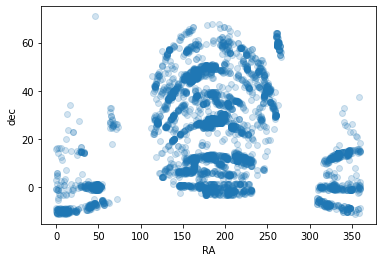

In [ ]:
# plot positions of galaxies

plt.scatter(ra,dec,alpha=0.2)
plt.ylabel('dec')
plt.xlabel('RA')

In [ ]:
# compute distance (in Mpc)
d=Distance(z=z,unit='Mpc',cosmology=WMAP7).value
M_i=m_i-5*np.log10(d)-25.0

Text(0.5, 0, '$M_i$')

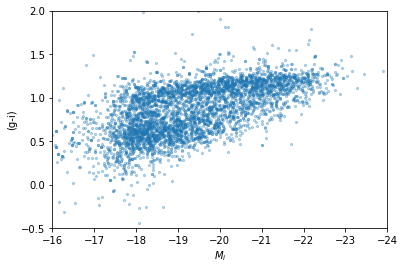

In [ ]:
plt.scatter(M_i,(m_g-m_i),s=5.,alpha=0.3)
plt.xlim([-16,-24])
plt.ylim([-0.5,2])
plt.ylabel('(g-i)')
plt.xlabel(r'$M_i$')

Lets look at images close to the Coma cluster

In [124]:
pos = coords.SkyCoord('12h59m35.7s +27d57m33.0s', frame='icrs')
print(pos.ra.deg, pos.dec.deg)
image=SDSS.get_images(pos,radius=0.1*u.deg)

194.89874999999998 27.959166666666665


In [163]:
!pip install reproject

In [165]:
from astropy.wcs import WCS
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename

from reproject import reproject_interp
from reproject.mosaicking import reproject_and_coadd
from reproject.mosaicking import find_optimal_celestial_wcs

hdus = [image[i][0] for i in range(len(image))]
wcs_out, shape_out = find_optimal_celestial_wcs(hdus)

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.


In [166]:
array, footprint = reproject_and_coadd(hdus,wcs_out, shape_out=shape_out,reproject_function=reproject_interp)

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.


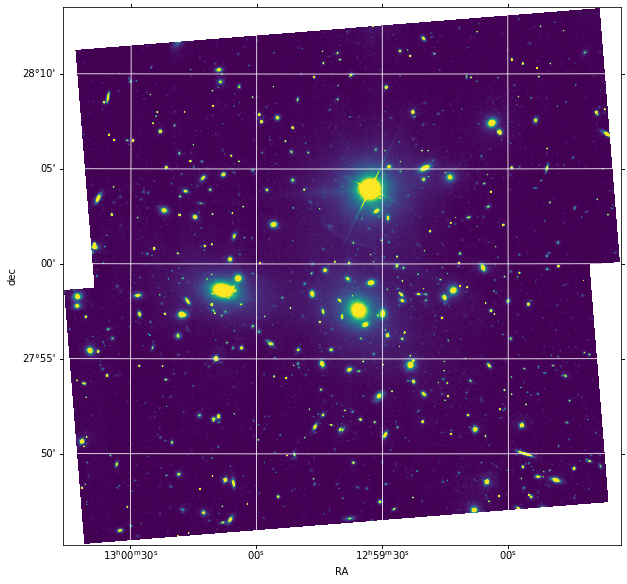

In [167]:
f=plt.figure(figsize=(10, 10))
ax=f.add_subplot(projection=wcs_out)
ax.imshow(array, vmin=-2.e-5, vmax=2.e-1, origin='lower')
ax.grid(color='white', ls='solid')
plt.xlabel('RA')
plt.ylabel('dec')